In [9]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [10]:
import yfinance as yf

# Descargar datos de Tesla
tesla_data = yf.download("TSLA", start="2020-01-01", end="2023-01-01")

# Restablecer el índice
tesla_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date  Adj Close      Close       High        Low       Open  \
Ticker                  TSLA       TSLA       TSLA       TSLA       TSLA   
0      2020-01-02  28.684000  28.684000  28.713333  28.114000  28.299999   
1      2020-01-03  29.534000  29.534000  30.266666  29.128000  29.366667   
2      2020-01-06  30.102667  30.102667  30.104000  29.333332  29.364668   
3      2020-01-07  31.270666  31.270666  31.441999  30.224001  30.760000   
4      2020-01-08  32.809334  32.809334  33.232666  31.215334  31.580000   

Price      Volume  
Ticker       TSLA  
0       142981500  
1       266677500  
2       151995000  
3       268231500  
4       467164500  


In [11]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de los datos de ingresos de Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Agregar un User-Agent para evitar bloqueos
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
html_data = requests.get(url, headers=headers).text

# Parsear con BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Buscar todas las tablas en la página
tables = soup.find_all("table")
print(f"Se encontraron {len(tables)} tablas.")  # Verifica cuántas tablas hay

# Verificar si la tabla está en el índice esperado
if len(tables) > 1:
    tesla_revenue_table = tables[1]
    tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

    # Limpiar el DataFrame
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != "-"]
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype("float")

    # Mostrar las últimas 5 filas
    print(tesla_revenue.tail())


Se encontraron 6 tablas.
          Date  Revenue
57  2010-06-30     28.0
58  2010-03-31     21.0
59  2009-12-31      NaN
60  2009-09-30     46.0
61  2009-06-30     27.0


C:\Users\Nicolas Leiva\AppData\Local\Temp\ipykernel_4672\3549683100.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]


In [15]:
# Descargar datos de GameStop
gme_data = yf.download("GME", start="2020-01-01", end="2023-01-01")

# Restablecer el índice
gme_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date Adj Close   Close    High     Low    Open    Volume
Ticker                  GME     GME     GME     GME     GME       GME
0      2020-01-02    1.5775  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03    1.4700  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06    1.4625  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07    1.3800  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08    1.4300  1.4300  1.4625  1.3525  1.3725  22517600


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de los datos de ingresos de GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Agregar un User-Agent para evitar bloqueos
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
html_data = requests.get(url, headers=headers).text

# Parsear con BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Buscar todas las tablas en la página
tables = soup.find_all("table")
print(f"Se encontraron {len(tables)} tablas.")  # Verifica cuántas tablas hay

# Asegurarse de que la tabla exista
if len(tables) > 1:
    gme_revenue_table = tables[1]
    gme_revenue = pd.read_html(str(gme_revenue_table))[0]

    # Limpiar el DataFrame
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != "-"]
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype("float")

    # Mostrar las últimas 5 filas
    print(gme_revenue.tail())

Se encontraron 6 tablas.
          Date  Revenue
58  2010-01-31   3524.0
59  2009-10-31   1835.0
60  2009-07-31   1739.0
61  2009-04-30   1981.0
62  2009-01-31   3492.0


C:\Users\Nicolas Leiva\AppData\Local\Temp\ipykernel_4672\3745189424.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(gme_revenue_table))[0]


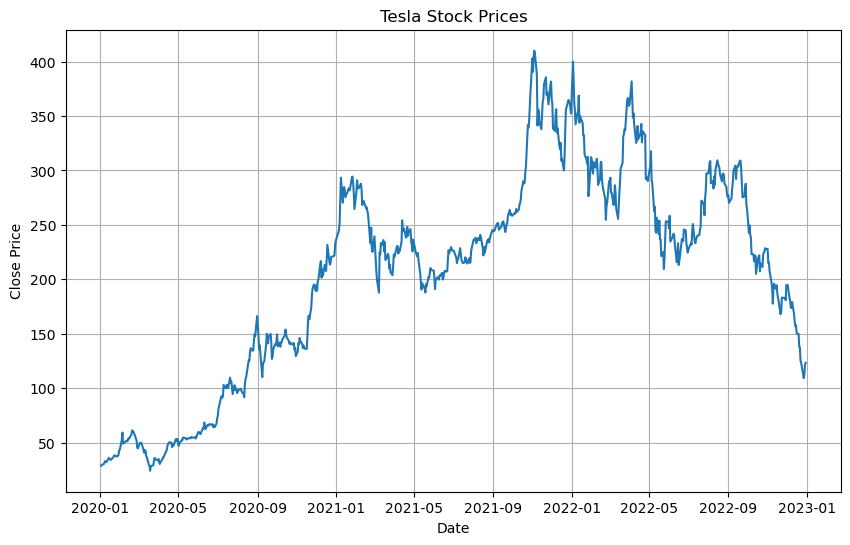

In [18]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data["Date"], data["Close"])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.show()

# Graficar los datos de Tesla
make_graph(tesla_data, "Tesla Stock Prices")

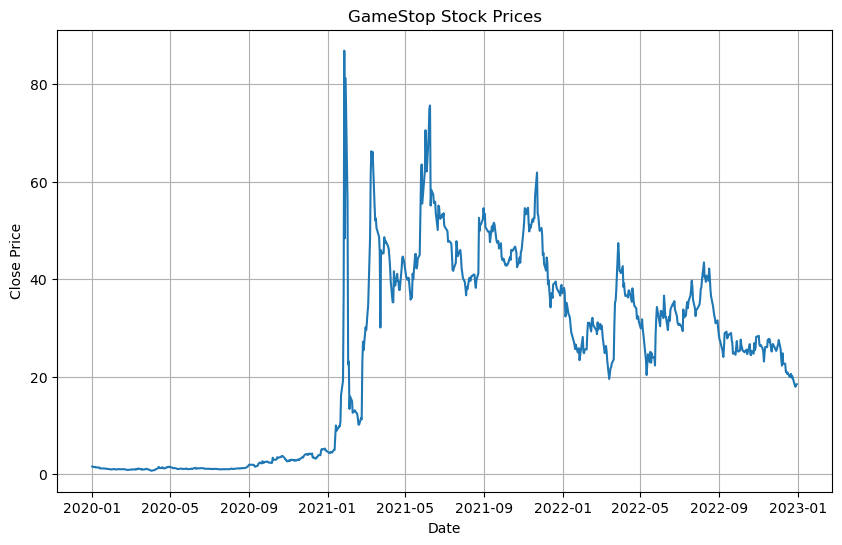

In [19]:
make_graph(gme_data, "GameStop Stock Prices")

